## Пример построения  двухслойной нейронной сети на numpy

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split


### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)


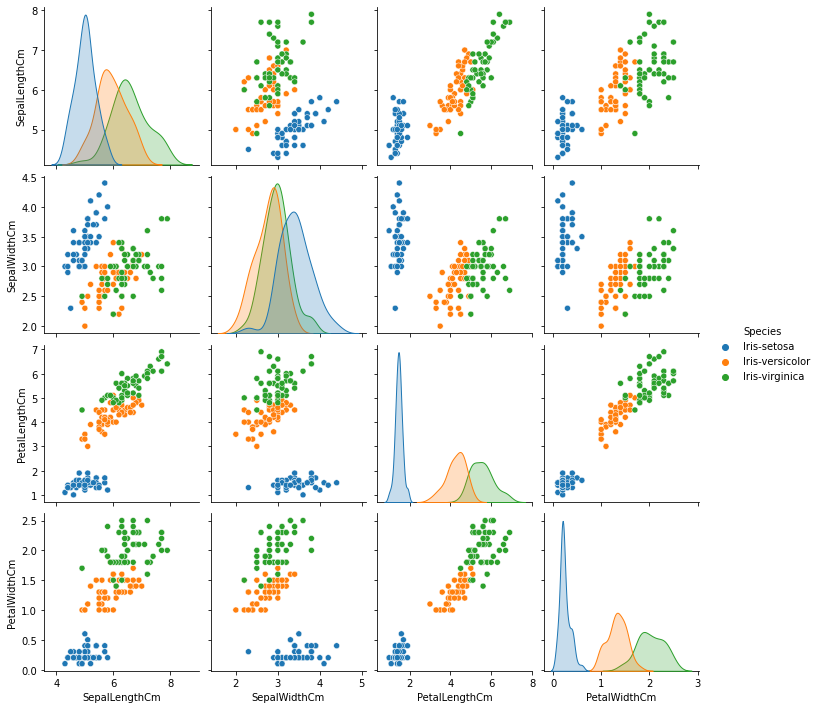

In [3]:
### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv('/content/drive/MyDrive/Iris.csv')
# print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
# plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
   

In [4]:
# Параметры нейронной сети:
# определяем количество выходных значений
n_out = 3
# определяем количество входных параметров 
n_in = 4


In [5]:

def test_neuron_params(neuron_numb, n, n_iters):
  ### Шаг 3. Обученние нейронной сети
  # присваевание случайных весов
  w0 = 2*np.random.random((n_in, neuron_numb)) - 1 # для входного слоя   - n_in входа, neuron_numb выхода
  w1 = 2*np.random.random((neuron_numb, n_out)) - 1 # для внутреннего слоя - neuron_numb входов, n_out выхода

  # массив для ошибок, чтобы потом построить график
  errors = []
  results = []
  # процесс обучения
  for i in range(n_iters):

      # прямое распространение(feed forward)
      layer0 = X_train
      layer1 = sigmoid(np.dot(layer0, w0))
      layer2 = sigmoid(np.dot(layer1, w1))

      # обратное распространение(back propagation) с использованием градиентного спуска
      layer2_error = y_train - layer2
      layer2_delta = layer2_error * sigmoid_deriv(layer2)
      
      layer1_error = layer2_delta.dot(w1.T)
      layer1_delta = layer1_error * sigmoid_deriv(layer1)
      
      w1 += layer1.T.dot(layer2_delta) * n
      w0 += layer0.T.dot(layer1_delta) * n
      
      error = np.mean(np.abs(layer2_error))
      errors.append(error)

      # метрики качества
      preds = np.argmax(layer2, axis=1)
      labels = np.argmax(y_train, axis=1)
      result = (preds == labels).sum() * 100 / len(labels)
      results.append(result)


  ### Шаг 4. Демонстрация полученных результатов
  print("Точность нейронной сети " + str(round(result,2)) + "%")

  # Диаграмма точности в зависимости от обучения
  plt.figure(figsize=(16, 5))
  plt.plot(errors)
  plt.xlabel('Обучение')
  plt.ylabel('Ошибка')
  plt.show()

  plt.figure(figsize=(16, 5))
  plt.plot(results)
  plt.xlabel('Количество итераций')
  plt.ylabel('Results')
  plt.show()

Точность нейронной сети 86.0%


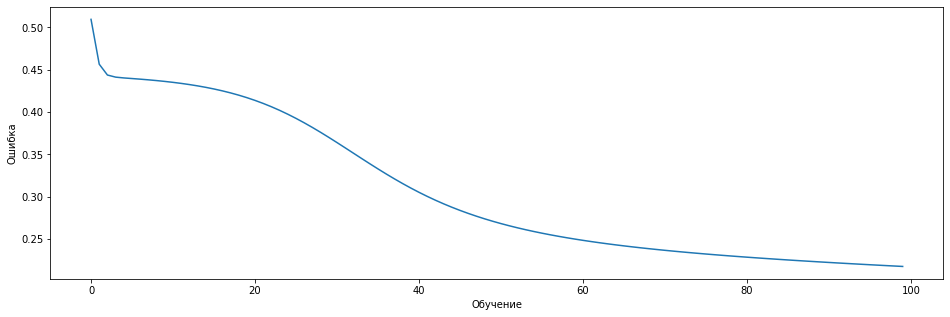

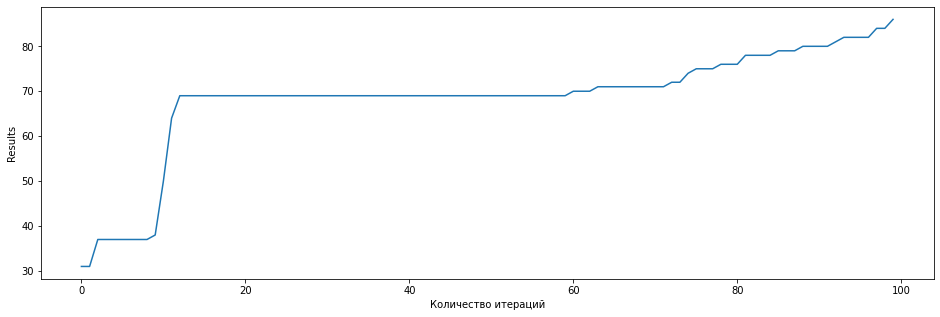

In [6]:
neuron_numb = 5
n = 0.1
n_iters = 100
test_neuron_params(neuron_numb, n, n_iters)

Точность нейронной сети 92.0%


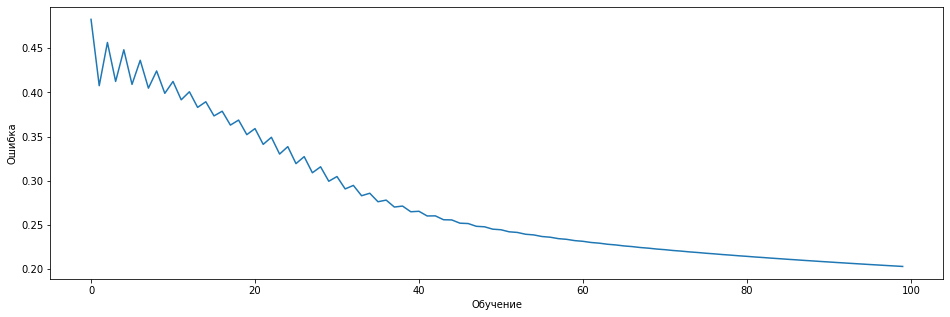

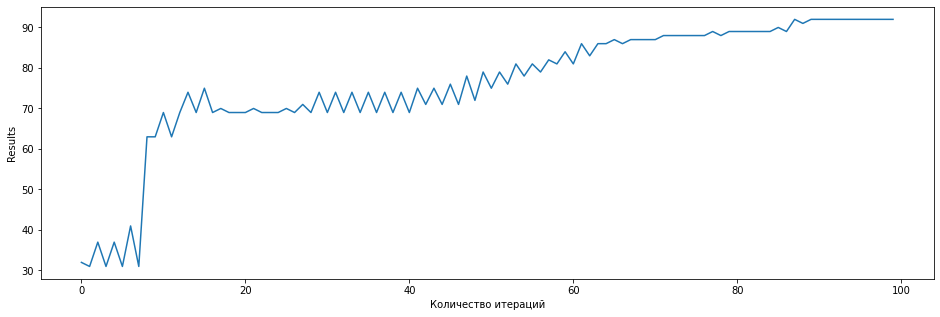

In [7]:
neuron_numb = 15
n = 0.1
n_iters = 100
test_neuron_params(neuron_numb, n, n_iters)

Точность нейронной сети 92.0%


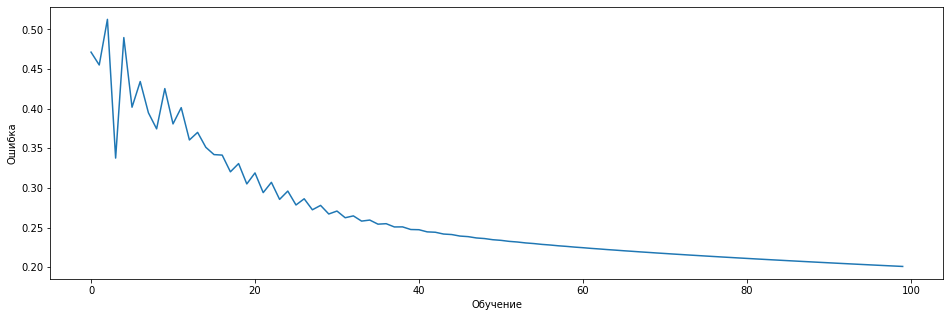

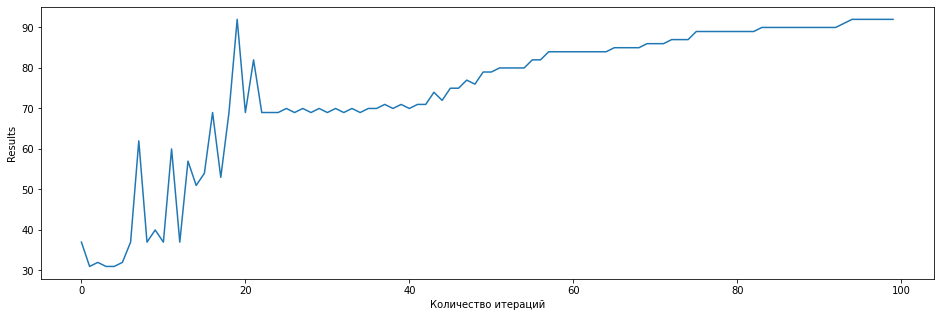

In [8]:
neuron_numb = 40
n = 0.1
n_iters = 100
test_neuron_params(neuron_numb, n, n_iters)

## При увеличении количества нейронов, можно сделать вывод, что высокая точность НС достигается уже при определенном кличестве нейронов, и имеет оптимальное значение.

Точность нейронной сети 89.0%


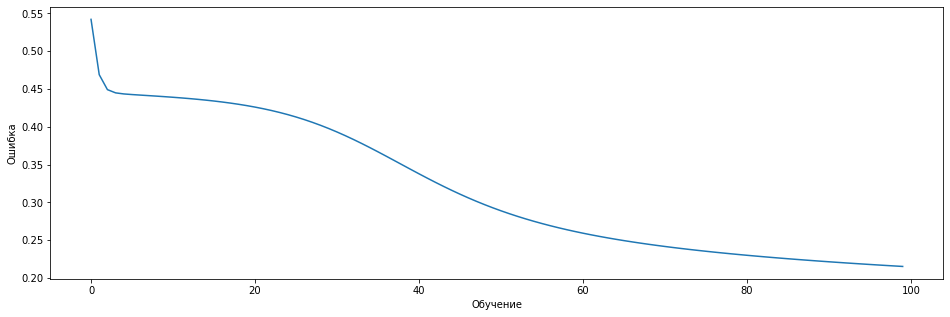

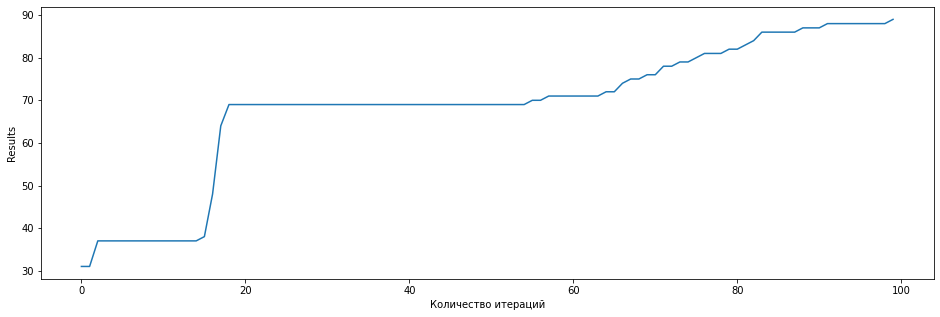

In [9]:
neuron_numb = 5
n = 0.1
n_iters = 100
test_neuron_params(neuron_numb, n, n_iters)

Точность нейронной сети 98.0%


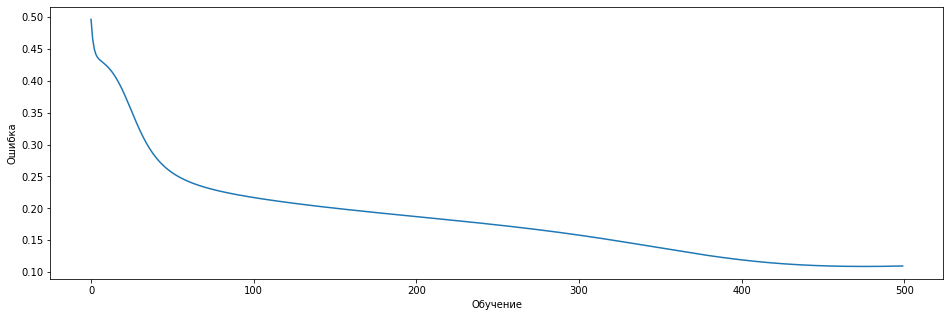

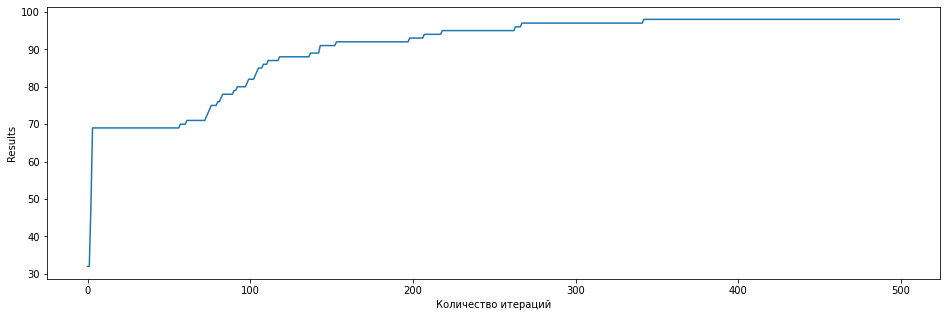

In [10]:
neuron_numb = 5
n = 0.1
n_iters = 500
test_neuron_params(neuron_numb, n, n_iters)

Точность нейронной сети 94.0%


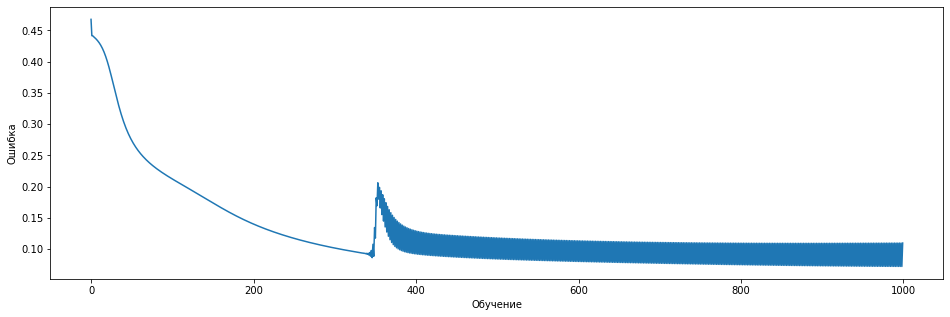

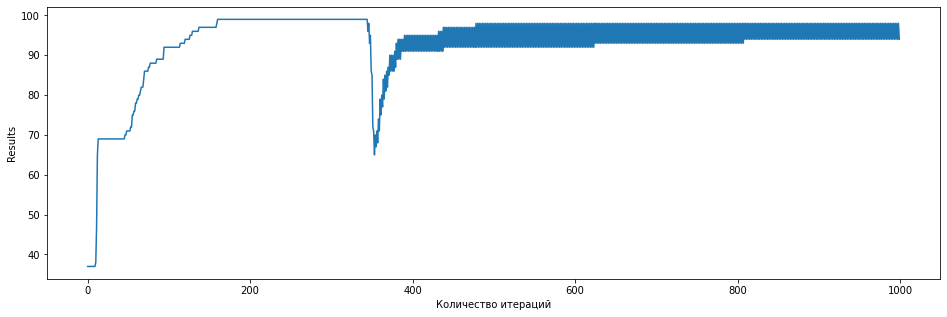

In [11]:
neuron_numb = 5
n = 0.1
n_iters = 1000
test_neuron_params(neuron_numb, n, n_iters)

## При увеличении количества итерации, видим, что качество НС повышается, но до определенного момента, дальнейшие итерации теряют смысл, более того, по графику виден провал в качестве, при избыточном количестве итерации.

Точность нейронной сети 81.0%


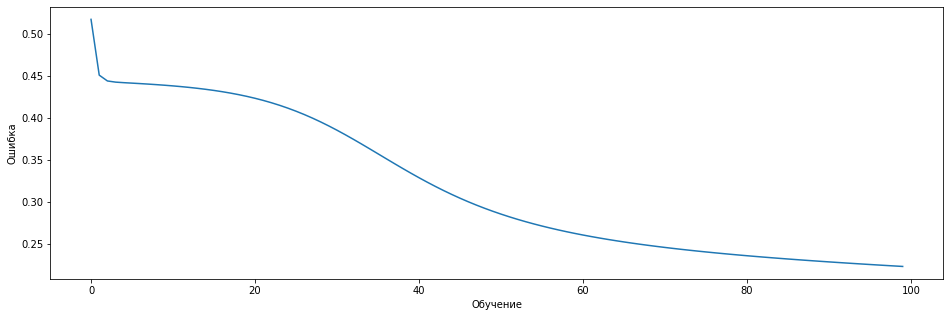

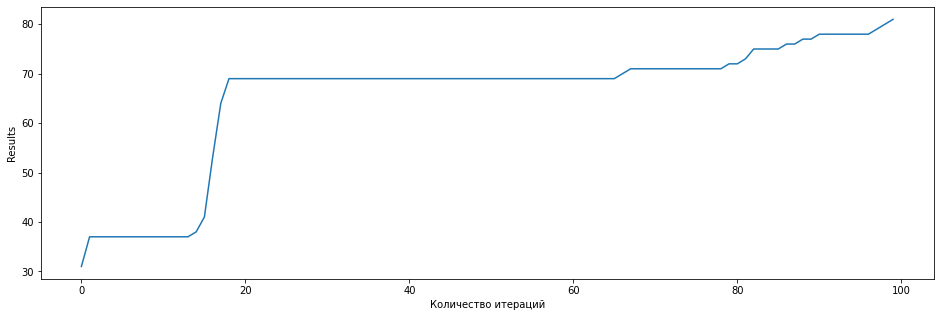

In [12]:
neuron_numb = 5
n = 0.1
n_iters = 100
test_neuron_params(neuron_numb, n, n_iters)

Точность нейронной сети 69.0%


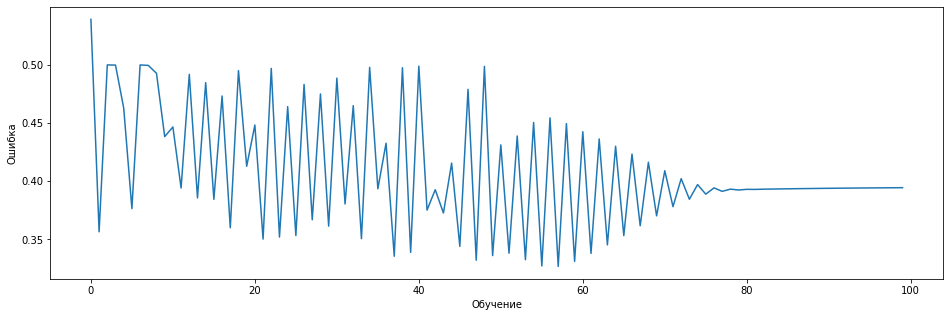

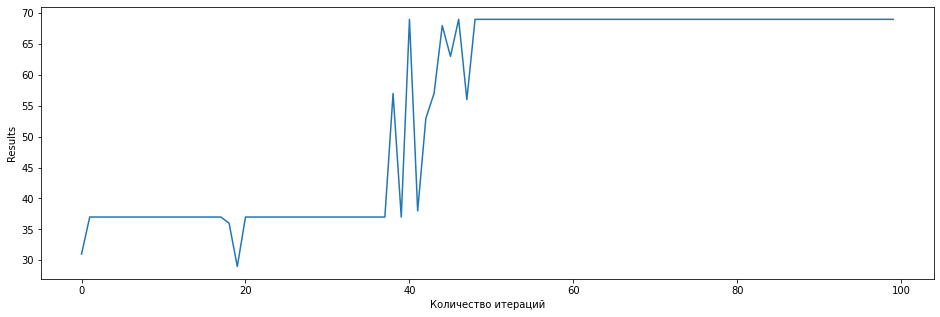

In [13]:
neuron_numb = 5
n = 1
n_iters = 100
test_neuron_params(neuron_numb, n, n_iters)

Точность нейронной сети 69.0%


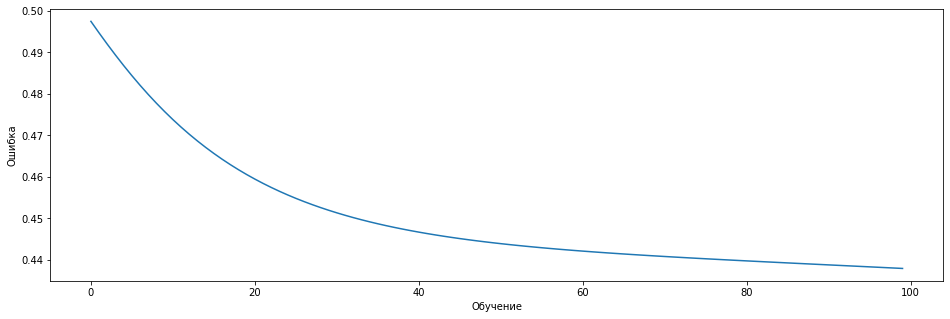

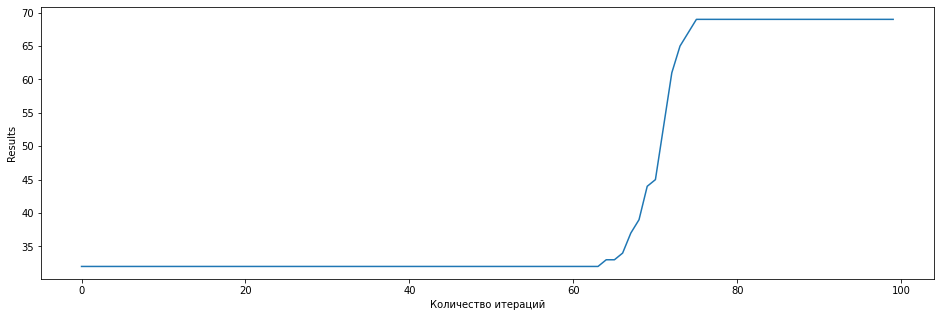

In [14]:
neuron_numb = 5
n = 0.01
n_iters = 100
test_neuron_params(neuron_numb, n, n_iters)

## При изменении скорости обучения(шага градиентного спуска) мы видим снижение качества НС как при увеличении шага, так и при уменьшении шага. Это связано с тем, шаг определяет точность НС и зависит от количества итераций. Для решения этой проблемы, рекомендуется при уменьшении шага, увеличивать количество итераций, и наборот, для поиска оптимальных значений.